In [1]:
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline
from PIL import Image as im

In [2]:
import os
from tqdm.notebook import tqdm 

dataset = []
classes=os.listdir('dataset')
for Class in classes:
    for image in tqdm(os.listdir(f'dataset/{Class}/')):
        dataset.append(f'dataset/{Class}/{image}')

len(dataset)

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

24

In [3]:
dataset

['dataset/0/0 (1).png',
 'dataset/0/0 (10).png',
 'dataset/0/0 (11).png',
 'dataset/0/0 (12).png',
 'dataset/0/0 (2).png',
 'dataset/0/0 (3).png',
 'dataset/0/0 (4).png',
 'dataset/0/0 (5).png',
 'dataset/0/0 (6).png',
 'dataset/0/0 (7).png',
 'dataset/0/0 (8).png',
 'dataset/0/0 (9).png',
 'dataset/1/14.png',
 'dataset/1/23.png',
 'dataset/1/24.png',
 'dataset/1/3.png',
 'dataset/1/40.png',
 'dataset/1/59.png',
 'dataset/1/6.png',
 'dataset/1/67.png',
 'dataset/1/70.png',
 'dataset/1/72.png',
 'dataset/1/77.png',
 'dataset/1/8.png']

In [4]:
trainloader = []
for i in tqdm(dataset):
    image = im.open(i)
    imgarr = np.asarray(image)
    x = np.sum(imgarr)/784
    y = np.sum(imgarr-imgarr.T)/784
    label = int(i.split('/')[1])
    trainloader.append([x,y,label])
len(trainloader)

  0%|          | 0/24 [00:00<?, ?it/s]

24

In [5]:
trainloader

[[45.19515306122449, 26.448979591836736, 0],
 [47.13265306122449, 42.44897959183673, 0],
 [43.20663265306123, 35.91836734693877, 0],
 [48.11607142857143, 37.87755102040816, 0],
 [46.56505102040816, 34.285714285714285, 0],
 [47.53316326530612, 33.95918367346939, 0],
 [58.0905612244898, 39.83673469387755, 0],
 [53.433673469387756, 25.79591836734694, 0],
 [58.985969387755105, 46.04081632653061, 0],
 [31.520408163265305, 24.816326530612244, 0],
 [53.919642857142854, 42.12244897959184, 0],
 [43.411989795918366, 36.89795918367347, 0],
 [14.823979591836734, 21.224489795918366, 1],
 [21.144132653061224, 21.877551020408163, 1],
 [28.020408163265305, 37.87755102040816, 1],
 [21.855867346938776, 23.836734693877553, 1],
 [17.46811224489796, 22.857142857142858, 1],
 [21.477040816326532, 24.163265306122447, 1],
 [22.507653061224488, 26.448979591836736, 1],
 [19.40561224489796, 25.79591836734694, 1],
 [28.1734693877551, 32.6530612244898, 1],
 [13.716836734693878, 18.285714285714285, 1],
 [21.63647959

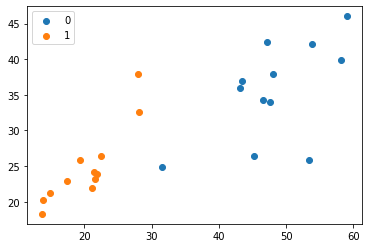

In [6]:
f10 = [i[0] for i in trainloader[:12]] #feature 1 (x) for 0
f20 = [i[1] for i in trainloader[:12]] #feature 2 (y) for 0
f11 = [i[0] for i in trainloader[12:]] #feature 1 (x) for 1
f21 = [i[1] for i in trainloader[12:]] #feature 2 (y) for 1

plt.scatter(f10,f20,label='0')
plt.scatter(f11,f21,label='1')
plt.legend()

****

Our Hypothesis:

\begin{equation}
\sigma(z) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-z} }
\end{equation}

\begin{equation}
z = ax+by+c
\end{equation}
Final hypothesis:

\begin{equation}
h_\theta(X) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-(ax+by+c)} }
\end{equation}



In [7]:
hypothesis = lambda x,y,a,b,c: 1/(1+np.exp(-(a*x+b*y+c)))

Loss function for N sample:

\begin{equation}
BCEloss(y,\hat{y}) = \frac{1}{N}\sum_{i = 1}^{N}(-y_i*\log{\hat{y}_i}-(1-y_i)*\log({1-\hat{y}_i}))
\end{equation}


Loss function for single sample:

<!-- \begin{equation}
L(label,pred) = -label*\log({pred})-(1-label)*\log({1-pred})
\end{equation} 
 -->

\begin{equation}
L(label,pred) = -label*\log({\sigma(z)})-(1-label)*\log({1-\sigma(z)})
\end{equation} 



In [8]:
def BCELoss(label,pred):
    
    return -label*np.log(pred) -(1-label)*np.log(1-pred)


Gradients

\begin{equation}
\frac{\partial L}{\partial a} = (\sigma(z)-label) *x 
\end{equation}

\begin{equation}
\frac{\partial L}{\partial b} = (\sigma(z)-label) *y 
\end{equation}

\begin{equation}
\frac{\partial L}{\partial c} = (\sigma(z)-label) 
\end{equation}


In [9]:
def gradients(x,y,pred,label):
    dc = (pred-label)
    da = dc*x
    db = dc*y
    return da,db,dc


Weights are updated as follows,

\begin{equation}
a_{new} = a - lr* \frac{\partial L}{\partial a} 
\end{equation}

\begin{equation}
b_{new} = b- lr* \frac{\partial L}{\partial b}
\end{equation}

\begin{equation}
c_{new} = c- lr* \frac{\partial L}{\partial c}
\end{equation}


In [12]:
def training(epochs,lr=0.001):
    a,b,c = 2,5,6

    for e in range(epochs):
        for data in trainloader:
            x,y,label=data
            yhat = hypothesis(x,y,a,b,c)
            l = BCELoss(label,yhat)
            da,db,dc=gradients(x,y,yhat,label)
            
            a-= lr*da
            b-= lr*db
            c-= lr*dc
            
            if (e+1)%2==0:
                plt.figure()
                y0 = -(a/b)*min(f11) -c/b
                y1 = -(a/b)*max(f10) -c/b
                plt.scatter(f10,f20,label='0')
                plt.scatter(f11,f21,label='1')
                plt.legend()
                plt.plot([min(f11),max(f10)],[y0,y1])
                plt.title("a {:.4}   b {:.4}   c {:.4}".format(a,b,c))
            


C:\Users\Samba\AppData\Local\Temp\ipykernel_14668\2285478421.py:3: RuntimeWarning: divide by zero encountered in log
  return -label*np.log(pred) -(1-label)*np.log(1-pred)
C:\Users\Samba\AppData\Local\Temp\ipykernel_14668\2285478421.py:3: RuntimeWarning: invalid value encountered in double_scalars
  return -label*np.log(pred) -(1-label)*np.log(1-pred)
C:\Users\Samba\AppData\Local\Temp\ipykernel_14668\252320155.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


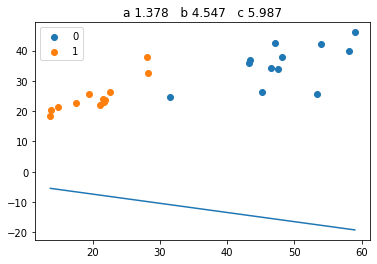

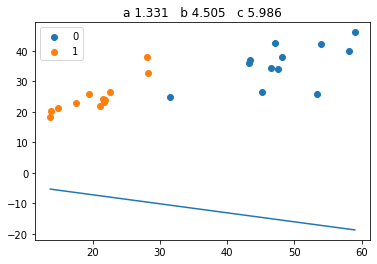

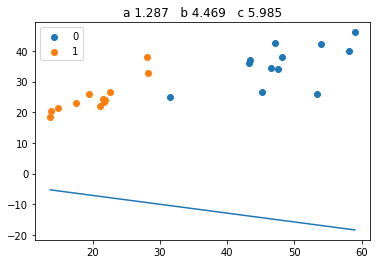

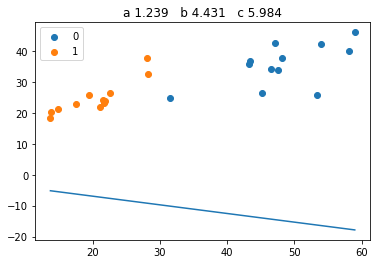

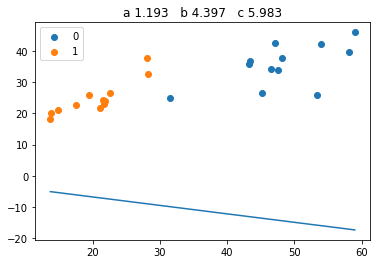

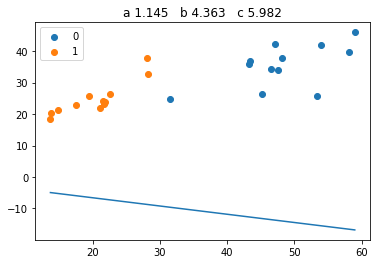

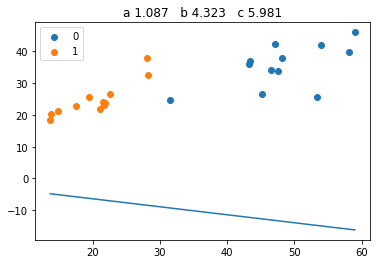

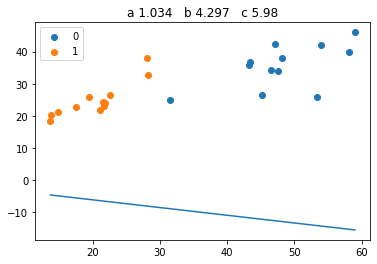

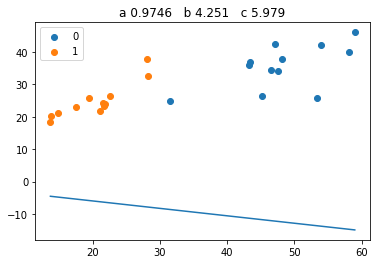

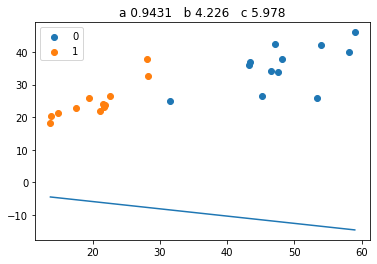

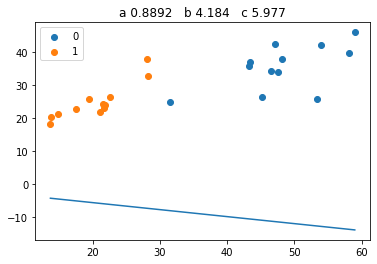

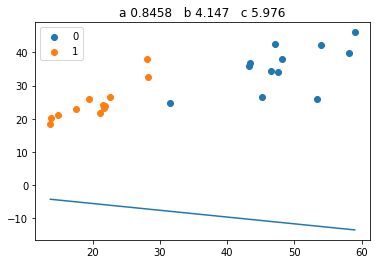

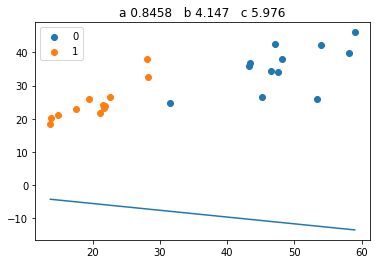

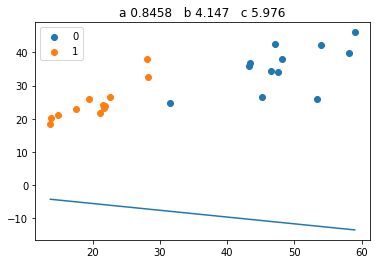

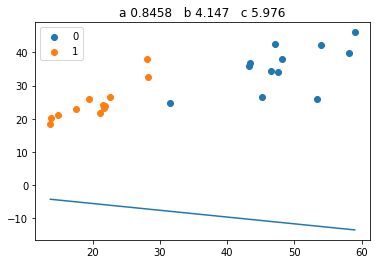

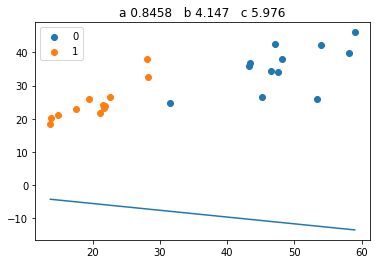

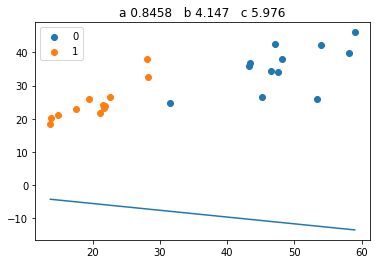

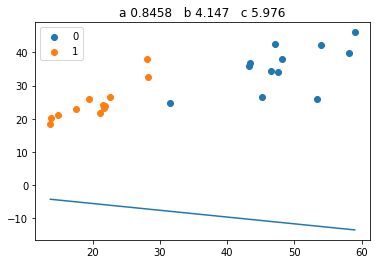

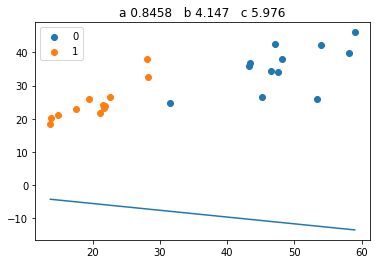

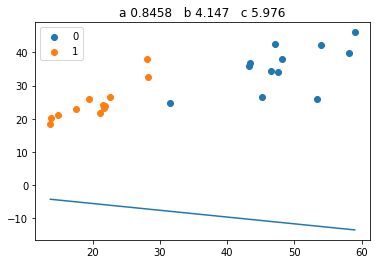

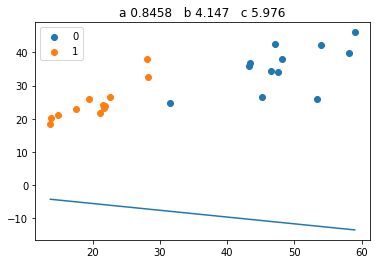

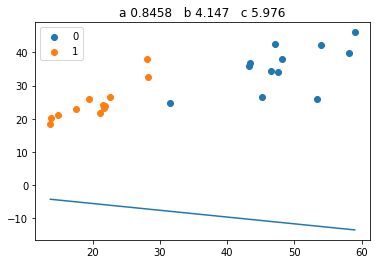

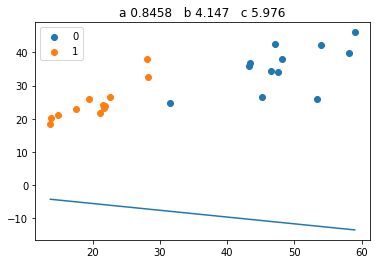

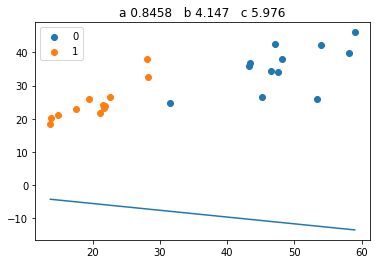

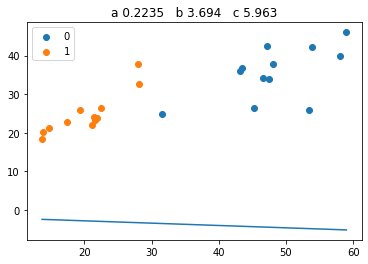

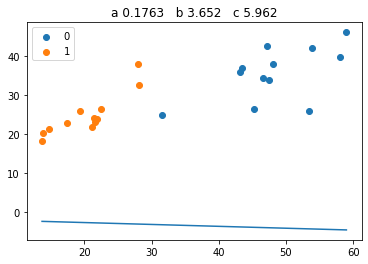

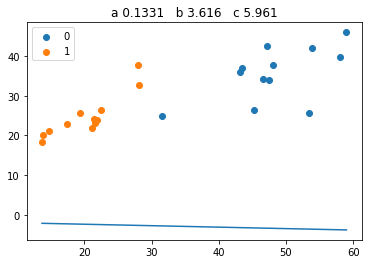

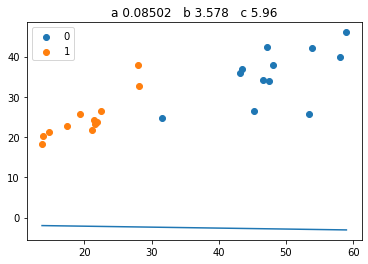

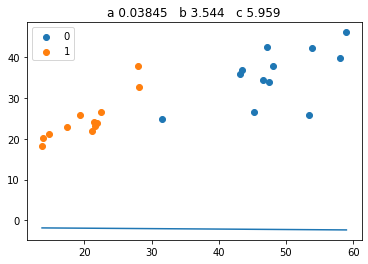

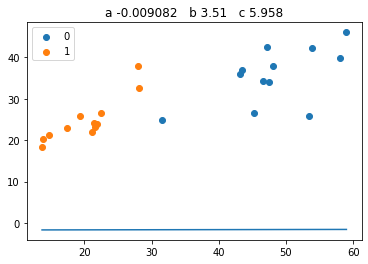

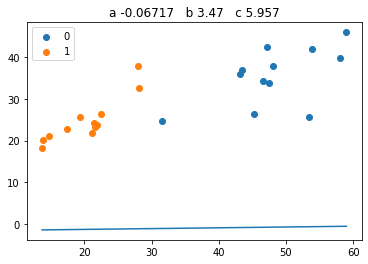

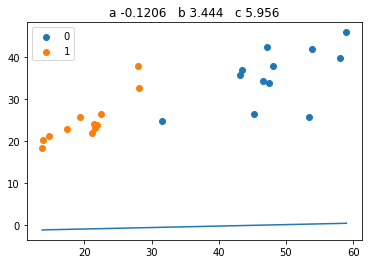

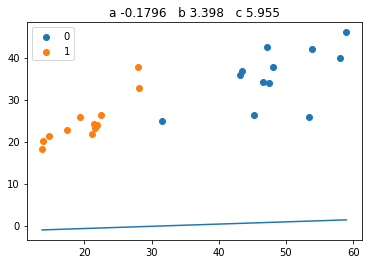

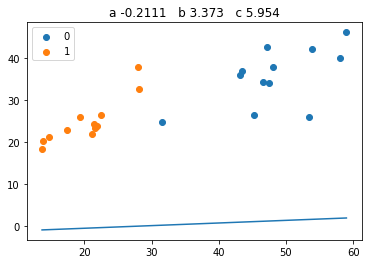

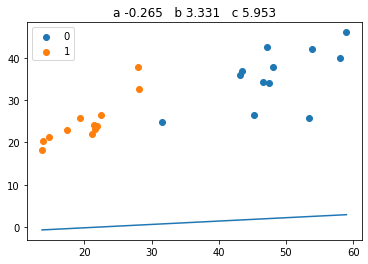

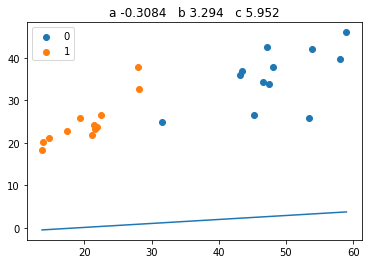

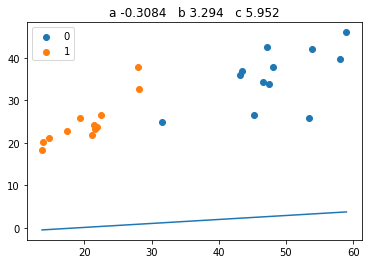

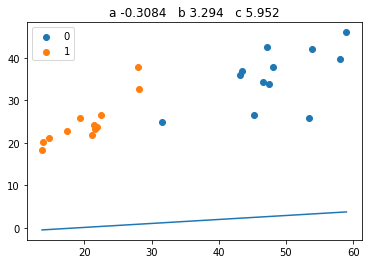

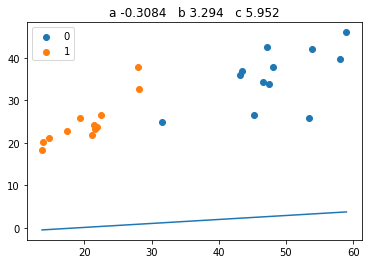

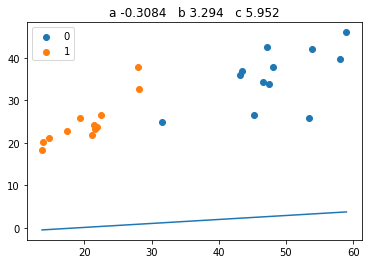

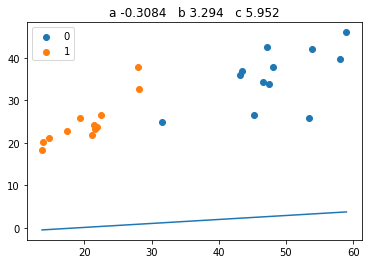

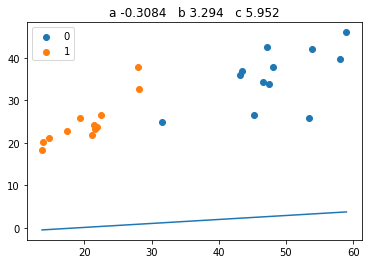

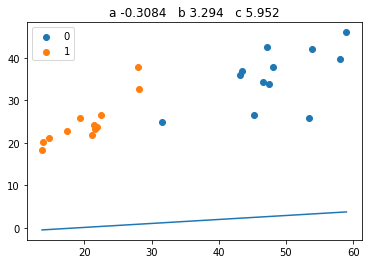

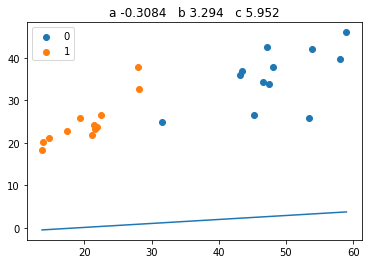

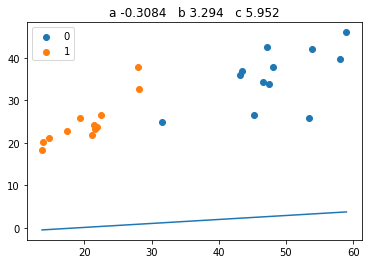

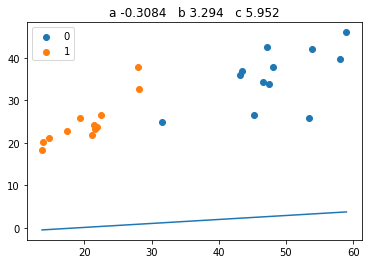

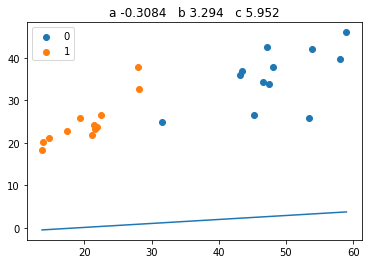

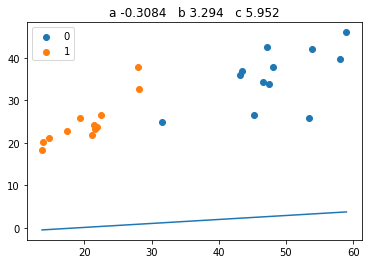

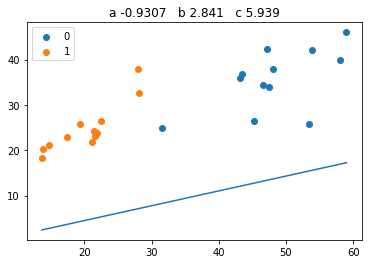

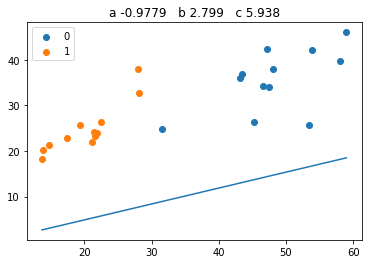

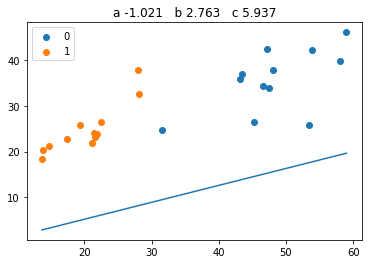

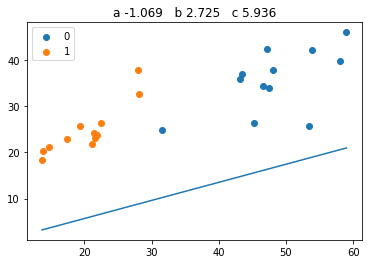

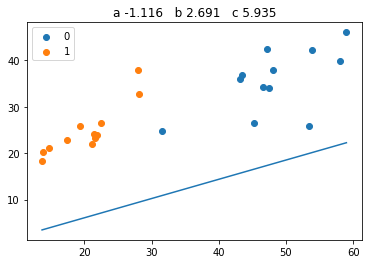

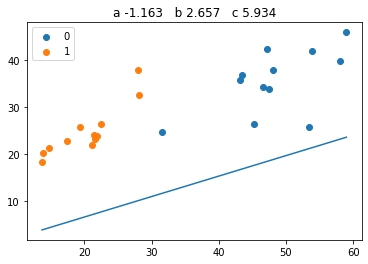

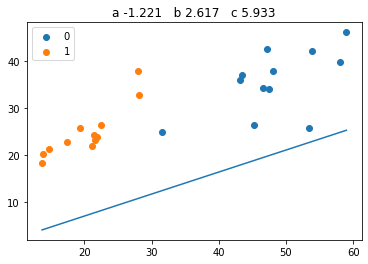

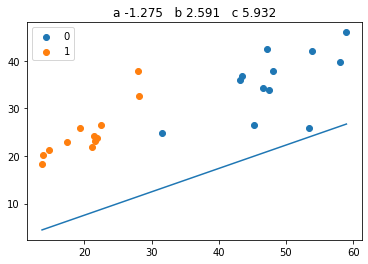

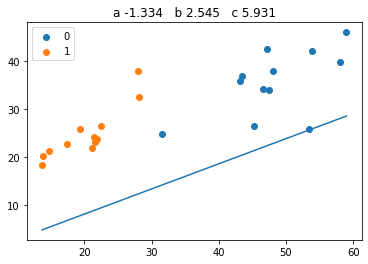

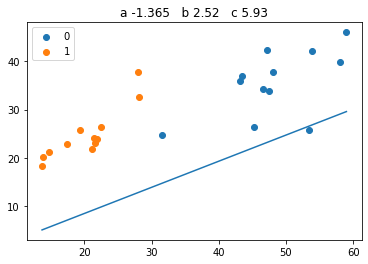

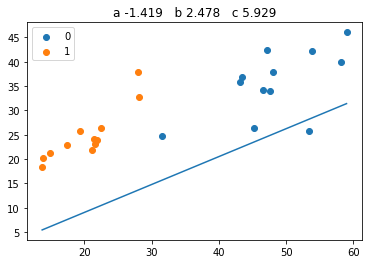

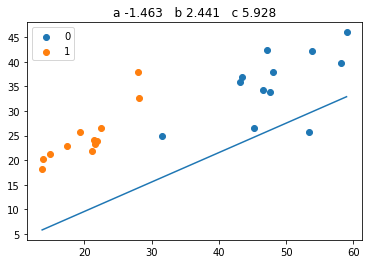

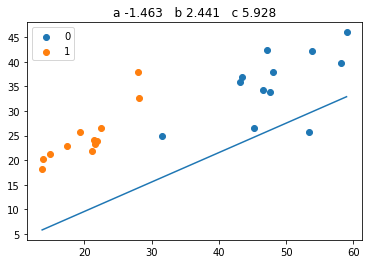

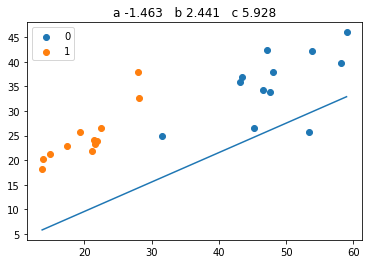

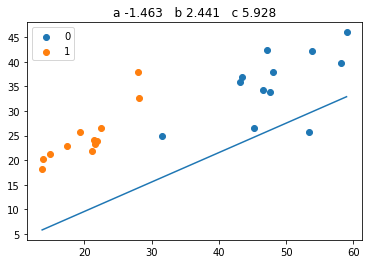

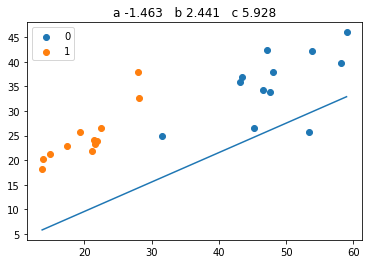

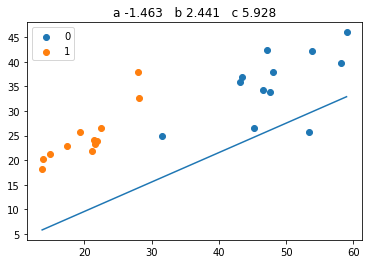

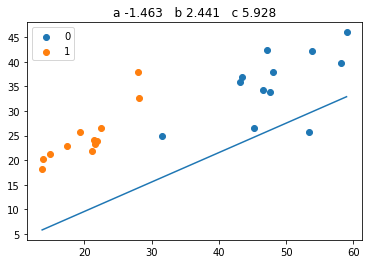

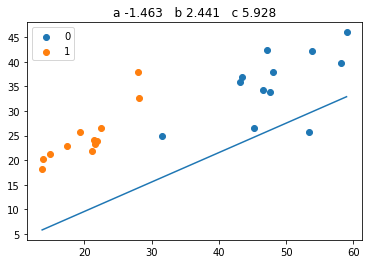

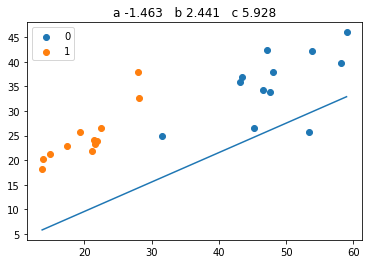

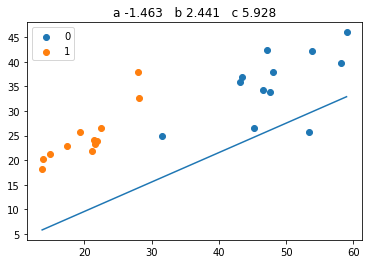

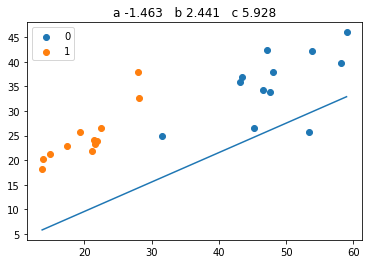

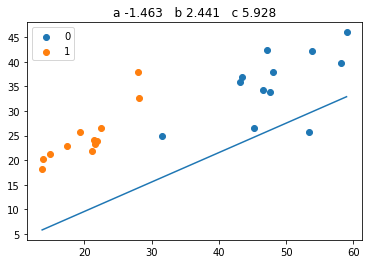

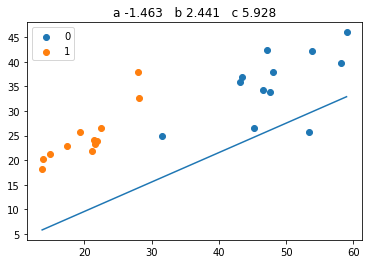

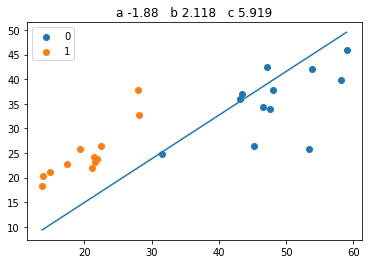

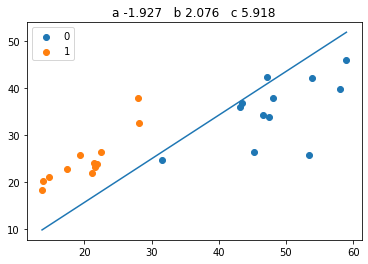

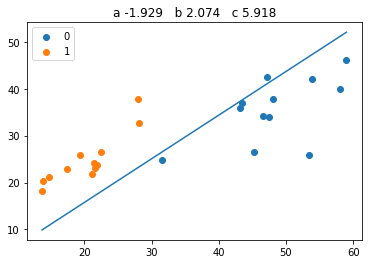

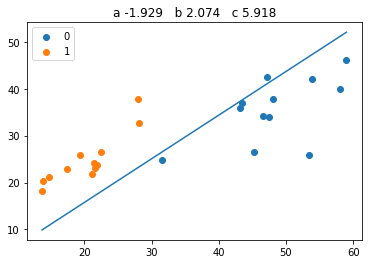

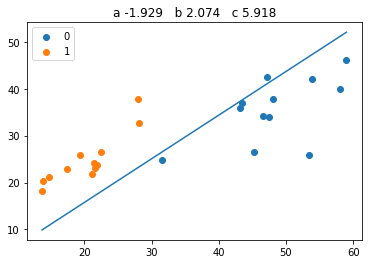

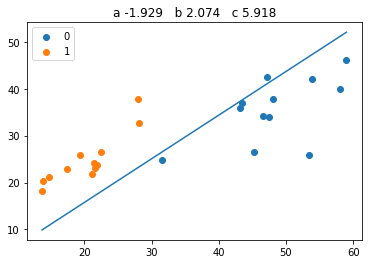

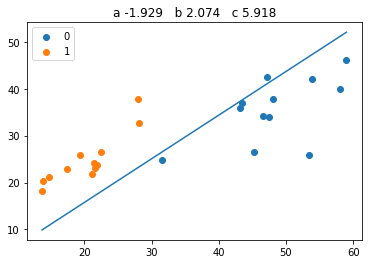

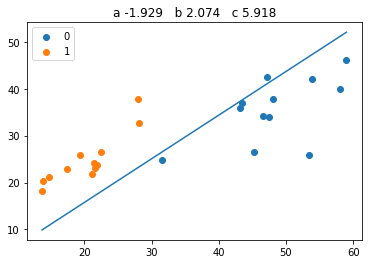

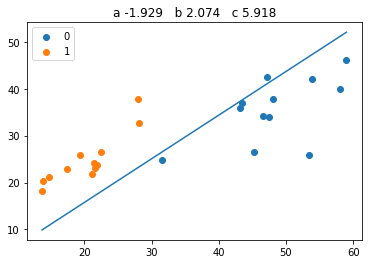

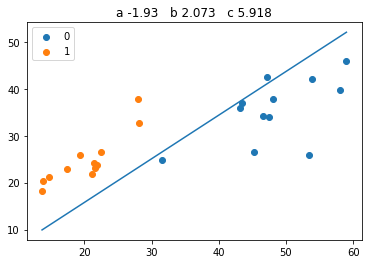

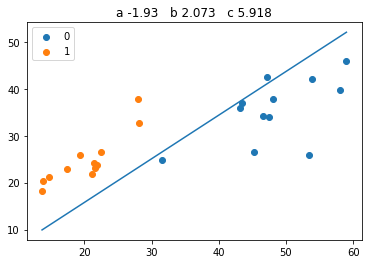

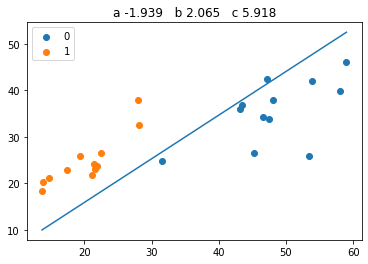

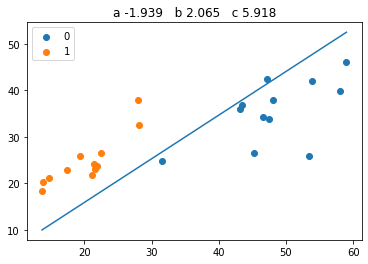

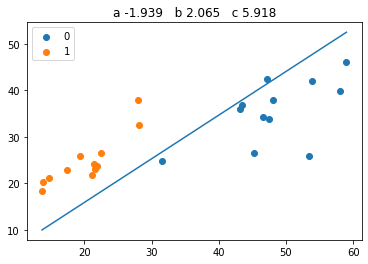

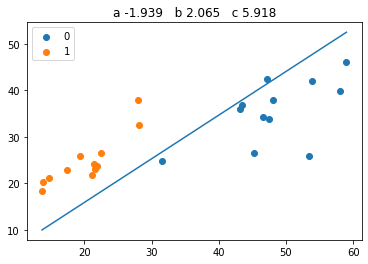

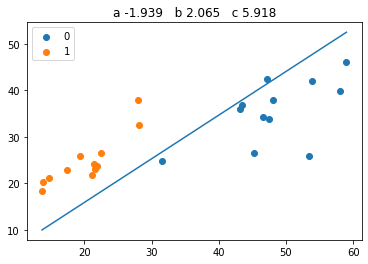

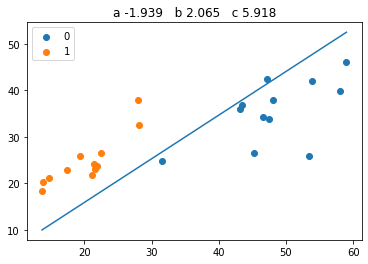

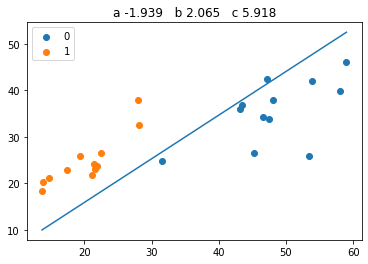

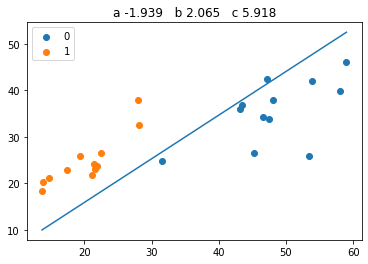

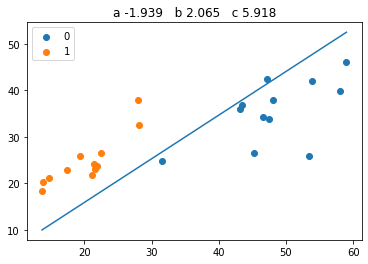

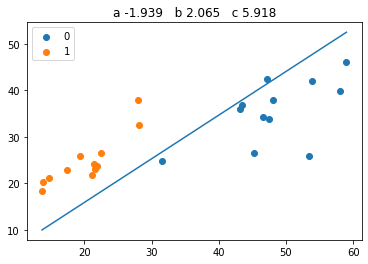

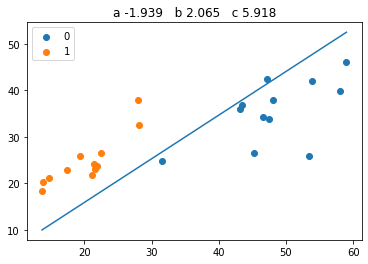

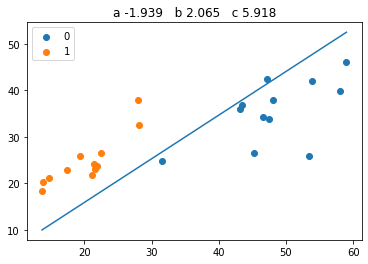

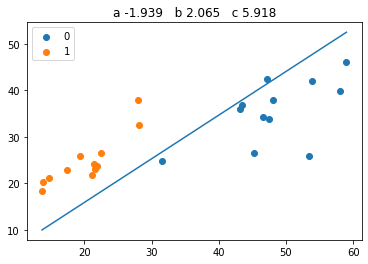

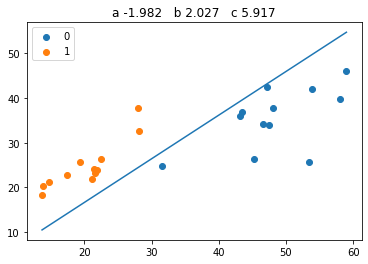

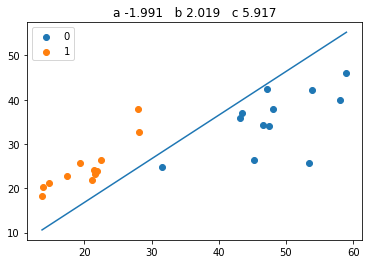

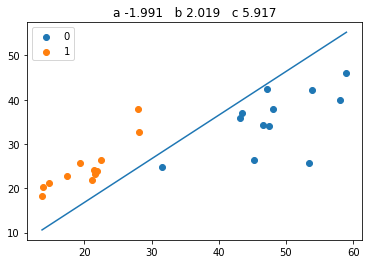

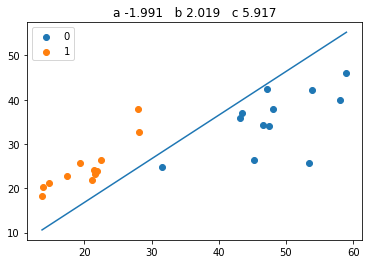

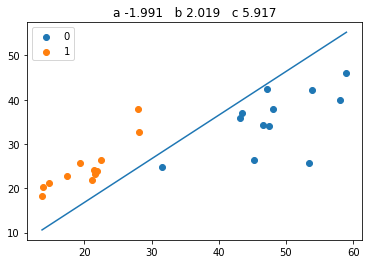

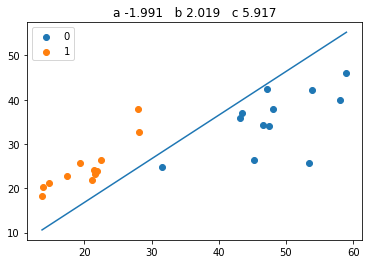

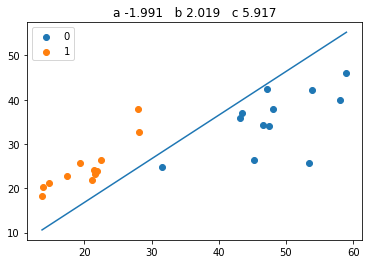

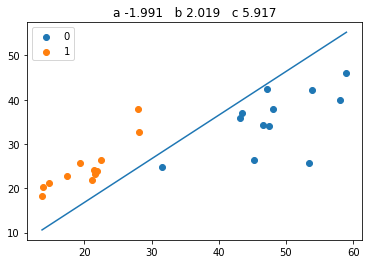

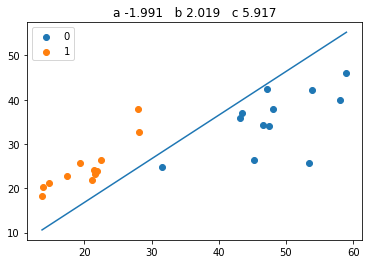

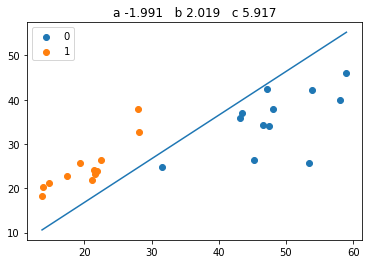

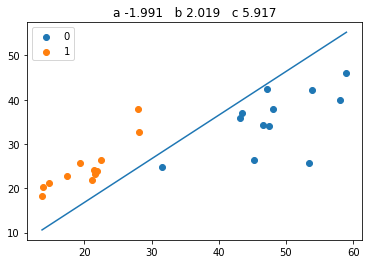

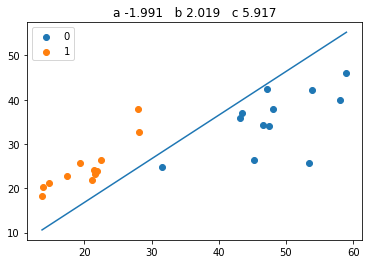

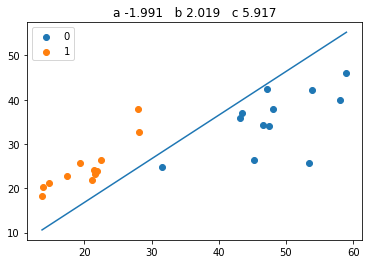

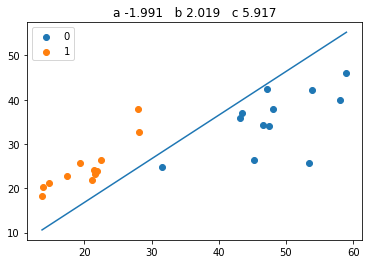

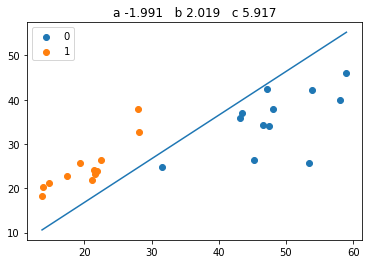

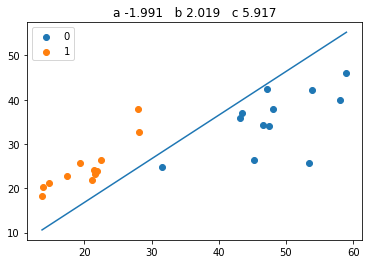

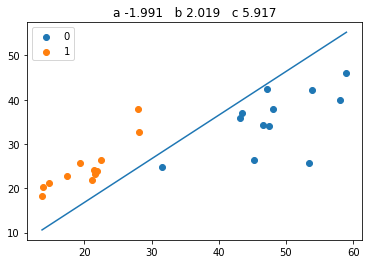

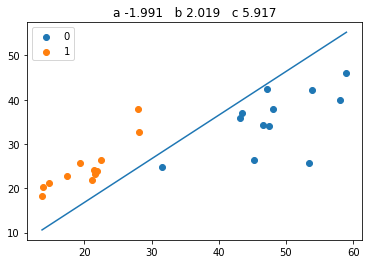

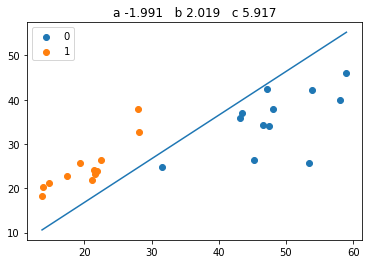

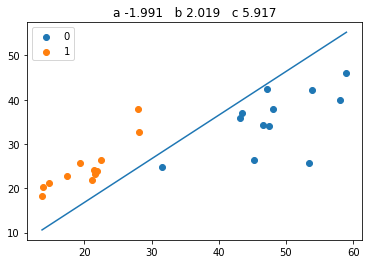

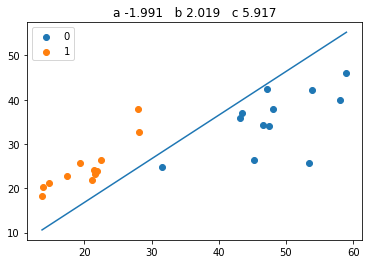

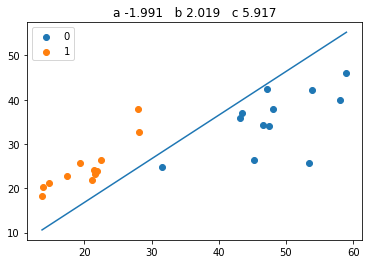

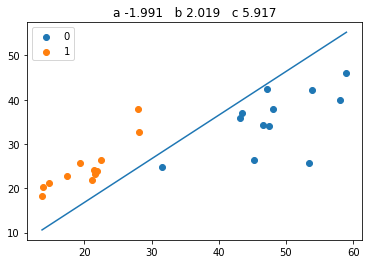

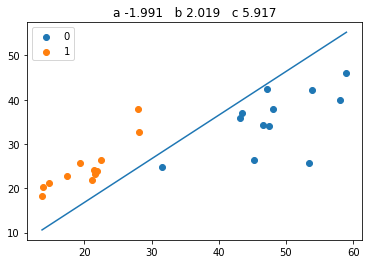

In [13]:
training(10)